# Part_3 Klik - CYFRYZACJA, POPRAWIANIE DANYCH
16:30 - 17:05

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy


In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Tue Mar 17 07:50:33 2020


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie.csv', sep=';')
print(df.shape)
print()
print(df.columns)
df.head(5)

(3619621, 24)

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9'],
      dtype='object')


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
0,93718246913880603,0,17030100,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,0,105,119743,10320,10050,12264,13,10427,100000,61
1,93718246913880604,0,17030100,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,105,115706,10320,10050,11722,10,10035,-1,79
2,93718246913880605,0,17030100,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,0,105,120352,10320,10050,12333,10,10039,-1,157
3,93718246913880606,0,17030100,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,0,105,117037,10320,10050,11934,12,10039,-1,16
4,93718246913880607,0,17030100,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,...,2,105,118993,10320,10050,12161,10,10035,100148,157


# <div class="alert-danger"> FILTR!!!
    
    df['urz_typ']
    df['baner_pozycja']
    df['urz_polaczenie']
    df['kat1']
    df['kat3']

### Sprawdzam kompletność danych
dane są kompletne

In [3]:
df.isnull().sum()

id                     0
klik                   0
data_godzina           0
baner_pozycja          0
strona_id              0
strona_domena          0
strona_kategoria       0
aplikacja_id           0
aplikacja_domena       0
aplikacja_kategoria    0
urz_id                 0
urz_ip                 0
urz_model              0
urz_typ                0
urz_polaczenie         0
kat1                   0
kat2                   0
kat3                   0
kat4                   0
kat5                   0
kat6                   0
kat7                   0
kat8                   0
kat9                   0
dtype: int64

### Sprawdzam format danych

In [4]:
df.dtypes

id                      int64
klik                    int64
data_godzina            int64
baner_pozycja           int64
strona_id              object
strona_domena          object
strona_kategoria       object
aplikacja_id           object
aplikacja_domena       object
aplikacja_kategoria    object
urz_id                 object
urz_ip                 object
urz_model              object
urz_typ                 int64
urz_polaczenie          int64
kat1                    int64
kat2                    int64
kat3                    int64
kat4                    int64
kat5                    int64
kat6                    int64
kat7                    int64
kat8                    int64
kat9                    int64
dtype: object

### Sprawdzam zbilansowanie zbioru wynikowego
<span style="color:blue">ZBIÓR JEST NIEZBILANSOWANY. Trzeba będzie zastosować oversampling</span>

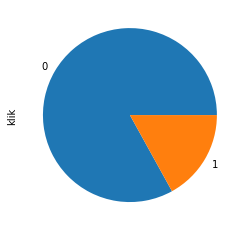

In [5]:
df.klik.value_counts(dropna = False, normalize=True).plot(kind='pie')

### Cyfryzuje słownikowo: 'date i godzinę'

In [6]:
df['data_godzina'].value_counts().shape

(216,)

In [7]:
df['data_godzina'].value_counts()

17030209    44832
17030210    43726
17030813    43283
17030212    40676
17030211    38932
            ...  
17030419     3461
17030423     2585
17030420     2329
17030421     2086
17030422     1523
Name: data_godzina, Length: 216, dtype: int64

<span style="color:blue">df['data_godzina'] będzie traktowana jak zmienna dyskretna. To nie jest żadna data i godzina, z której można wyciągnąć dzień tygodnia</span>

Cyfryzuje przez mapowanie słownikowe

In [8]:
df['C_data_godzina'] = pd.Categorical(df['data_godzina']).codes
df[['data_godzina','C_data_godzina']].sample(2)

,data_godzina,C_data_godzina
1175666,17030313,61
2386401,17030700,144


In [9]:
SL_data_godzina = df.set_index('data_godzina')['C_data_godzina'].to_dict()
print(SL_data_godzina)
df['CYF_data_godzina'] = df['data_godzina'].map(SL_data_godzina)
del df['C_data_godzina']
df[['CYF_data_godzina','data_godzina']].sample(4)

{17030100: 0, 17030101: 1, 17030102: 2, 17030103: 3, 17030104: 4, 17030105: 5, 17030106: 6, 17030107: 7, 17030108: 8, 17030109: 9, 17030110: 10, 17030111: 11, 17030112: 12, 17030113: 13, 17030114: 14, 17030115: 15, 17030116: 16, 17030117: 17, 17030118: 18, 17030119: 19, 17030120: 20, 17030121: 21, 17030122: 22, 17030123: 23, 17030200: 24, 17030201: 25, 17030202: 26, 17030203: 27, 17030204: 28, 17030205: 29, 17030206: 30, 17030207: 31, 17030208: 32, 17030209: 33, 17030210: 34, 17030211: 35, 17030212: 36, 17030213: 37, 17030214: 38, 17030215: 39, 17030216: 40, 17030217: 41, 17030218: 42, 17030219: 43, 17030220: 44, 17030221: 45, 17030222: 46, 17030223: 47, 17030300: 48, 17030301: 49, 17030302: 50, 17030303: 51, 17030304: 52, 17030305: 53, 17030306: 54, 17030307: 55, 17030308: 56, 17030309: 57, 17030310: 58, 17030311: 59, 17030312: 60, 17030313: 61, 17030314: 62, 17030315: 63, 17030316: 64, 17030317: 65, 17030318: 66, 17030319: 67, 17030320: 68, 17030321: 69, 17030322: 70, 17030323: 71, 1

,CYF_data_godzina,data_godzina
2177884,131,17030611
583492,32,17030208
1136153,58,17030310
252753,12,17030112


In [10]:
## Sprawdzenie:
print(df['data_godzina'].value_counts().shape)
print(df['CYF_data_godzina'].value_counts().shape)
print(SL_data_godzina)

(216,)
(216,)
{17030100: 0, 17030101: 1, 17030102: 2, 17030103: 3, 17030104: 4, 17030105: 5, 17030106: 6, 17030107: 7, 17030108: 8, 17030109: 9, 17030110: 10, 17030111: 11, 17030112: 12, 17030113: 13, 17030114: 14, 17030115: 15, 17030116: 16, 17030117: 17, 17030118: 18, 17030119: 19, 17030120: 20, 17030121: 21, 17030122: 22, 17030123: 23, 17030200: 24, 17030201: 25, 17030202: 26, 17030203: 27, 17030204: 28, 17030205: 29, 17030206: 30, 17030207: 31, 17030208: 32, 17030209: 33, 17030210: 34, 17030211: 35, 17030212: 36, 17030213: 37, 17030214: 38, 17030215: 39, 17030216: 40, 17030217: 41, 17030218: 42, 17030219: 43, 17030220: 44, 17030221: 45, 17030222: 46, 17030223: 47, 17030300: 48, 17030301: 49, 17030302: 50, 17030303: 51, 17030304: 52, 17030305: 53, 17030306: 54, 17030307: 55, 17030308: 56, 17030309: 57, 17030310: 58, 17030311: 59, 17030312: 60, 17030313: 61, 17030314: 62, 17030315: 63, 17030316: 64, 17030317: 65, 17030318: 66, 17030319: 67, 17030320: 68, 17030321: 69, 17030322: 70, 1

### Cyfryzuje słownikowo: 'baner_pozycja'
NIE TRZEBA CYFRYZOWAĆ

In [11]:
print(df['baner_pozycja'].value_counts().shape)
df['baner_pozycja'].value_counts()
df['CYF_baner_pozycja']=df['baner_pozycja']

(7,)


In [12]:
df.dtypes

id                      int64
klik                    int64
data_godzina            int64
baner_pozycja           int64
strona_id              object
strona_domena          object
strona_kategoria       object
aplikacja_id           object
aplikacja_domena       object
aplikacja_kategoria    object
urz_id                 object
urz_ip                 object
urz_model              object
urz_typ                 int64
urz_polaczenie          int64
kat1                    int64
kat2                    int64
kat3                    int64
kat4                    int64
kat5                    int64
kat6                    int64
kat7                    int64
kat8                    int64
kat9                    int64
CYF_data_godzina        int64
CYF_baner_pozycja       int64
dtype: object

### Cyfryzuje słownikowo:  'strona_id'

In [13]:
print(df['strona_id'].value_counts().shape)
df['strona_id'].value_counts()

(3369,)


85f751fd    1265256
1fbe01fe     590538
e151e245     235932
d9750ee7      89188
5b08c53b      81286
             ...   
18b71f5f          1
069ee5fb          1
d83295a5          1
cc0bfaac          1
b3380c23          1
Name: strona_id, Length: 3369, dtype: int64

In [14]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_id'] = pd.Categorical(df['strona_id']).codes
df[['strona_id','C_strona_id']].sample(2)

,strona_id,C_strona_id
1531260,e151e245,2948
2076813,93eaba74,1950


In [15]:
SL_strona_id = df.set_index('strona_id')['C_strona_id'].to_dict()
#print(SL_strona_id)
df['CYF_strona_id'] = df['strona_id'].map(SL_strona_id)
del df['C_strona_id']
df[['CYF_strona_id','strona_id']].sample(4)

,CYF_strona_id,strona_id
2022157,406,1fbe01fe
810580,1773,85f751fd
230020,406,1fbe01fe
2197809,2842,d8bb8687


In [16]:
## Sprawdzenie:
print(df['strona_id'].value_counts().shape)
print(df['CYF_strona_id'].value_counts().shape)
#print(SL_strona_id)

(3369,)
(3369,)


### <span style="color:blue">Cyfryzuje słownikowo: 'strona_domena'</span>

In [17]:
print(df['strona_domena'].value_counts().shape)
df['strona_domena'].value_counts()

(4152,)


c4e18dd6    1313523
f3845767     590538
7e091613     302658
7687a86e     115167
98572c79      92469
             ...   
3c282374          1
8f1332e2          1
08e2e023          1
39ceb77c          1
a931128b          1
Name: strona_domena, Length: 4152, dtype: int64

In [18]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_domena'] = pd.Categorical(df['strona_domena']).codes
df[['strona_domena','C_strona_domena']].sample(2)

,strona_domena,C_strona_domena
2429178,510bd839,1309
2788623,c7c13454,3251


In [19]:
SL_strona_domena = df.set_index('strona_domena')['C_strona_domena'].to_dict()
#print(SL_strona_domena)
df['CYF_strona_domena'] = df['strona_domena'].map(SL_strona_domena)
del df['C_strona_domena']
df[['CYF_strona_domena','strona_domena']].sample(4)

,CYF_strona_domena,strona_domena
2266133,3944,f3845767
3133365,3944,f3845767
2372100,3205,c4e18dd6
148178,3205,c4e18dd6


In [20]:
## Sprawdzenie:
print(df['strona_domena'].value_counts().shape)
print(df['CYF_strona_domena'].value_counts().shape)
#print(SL_strona_domena)

(4152,)
(4152,)


### <span style="color:blue">Cyfryzuje słownikowo: 'strona_kategoria'</span>

In [21]:
print(df['strona_kategoria'].value_counts().shape)
df['strona_kategoria'].value_counts()

(24,)


50e219e0    1441996
f028772b    1154376
28905ebd     673539
3e814130     275787
f66779e6      23845
75fa27f6      15398
335d28a8      12183
76b2941d      10087
c0dd3be3       3729
72722551       2365
dedf689d       2209
0569f928       1649
70fb0e29       1379
a818d37a        293
8fd0aea4        241
42a36e14        239
e787de0e        124
bcf865d9        109
5378d028         47
9ccfa2ea         19
74073276          4
110ab22d          1
c706e647          1
a72a0145          1
Name: strona_kategoria, dtype: int64

In [22]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_kategoria'] = pd.Categorical(df['strona_kategoria']).codes
df[['strona_kategoria','C_strona_kategoria']].sample(2)

,strona_kategoria,C_strona_kategoria
1591114,28905ebd,2
2385215,50e219e0,6


In [23]:
SL_strona_kategoria = df.set_index('strona_kategoria')['C_strona_kategoria'].to_dict()
print(SL_strona_kategoria)
df['CYF_strona_kategoria'] = df['strona_kategoria'].map(SL_strona_kategoria)
del df['C_strona_kategoria']
df[['CYF_strona_kategoria','strona_kategoria']].sample(4)

{'50e219e0': 6, '28905ebd': 2, '3e814130': 4, 'f028772b': 22, '72722551': 9, '76b2941d': 12, 'f66779e6': 23, '335d28a8': 3, '0569f928': 0, '75fa27f6': 11, 'c0dd3be3': 18, 'a818d37a': 16, '42a36e14': 5, '70fb0e29': 8, 'bcf865d9': 17, '8fd0aea4': 13, '5378d028': 7, 'e787de0e': 21, 'dedf689d': 20, '74073276': 10, '9ccfa2ea': 14, '110ab22d': 1, 'c706e647': 19, 'a72a0145': 15}


,CYF_strona_kategoria,strona_kategoria
653142,22,f028772b
297379,2,28905ebd
90048,22,f028772b
2786383,2,28905ebd


In [24]:
## Sprawdzenie:
print(df['strona_kategoria'].value_counts().shape)
print(df['CYF_strona_kategoria'].value_counts().shape)
print(SL_strona_kategoria)

(24,)
(24,)
{'50e219e0': 6, '28905ebd': 2, '3e814130': 4, 'f028772b': 22, '72722551': 9, '76b2941d': 12, 'f66779e6': 23, '335d28a8': 3, '0569f928': 0, '75fa27f6': 11, 'c0dd3be3': 18, 'a818d37a': 16, '42a36e14': 5, '70fb0e29': 8, 'bcf865d9': 17, '8fd0aea4': 13, '5378d028': 7, 'e787de0e': 21, 'dedf689d': 20, '74073276': 10, '9ccfa2ea': 14, '110ab22d': 1, 'c706e647': 19, 'a72a0145': 15}


### <span style="color:blue">Cyfryzuje słownikowo: 'aplikacja_id'</span>

In [25]:
print(df[ 'aplikacja_id'].value_counts().shape)
df[ 'aplikacja_id'].value_counts()

(4742,)


ecad2386    2354365
92f5800b     155253
e2fcccd2      99800
febd1138      67475
7358e05e      57961
             ...   
67d019eb          1
513e0a8f          1
9a75a56d          1
517c762d          1
6ec849f9          1
Name: aplikacja_id, Length: 4742, dtype: int64

In [26]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_id'] = pd.Categorical(df['aplikacja_id']).codes
df[['aplikacja_id','C_aplikacja_id']].sample(2)

,aplikacja_id,C_aplikacja_id
252334,ecad2386,4353
2845513,92f5800b,2707


In [27]:
SL_aplikacja_id = df.set_index('aplikacja_id')['C_aplikacja_id'].to_dict()
#print(SL_aplikacja_id)
df['CYF_aplikacja_id'] = df['aplikacja_id'].map(SL_aplikacja_id)
del df['C_aplikacja_id']
df[['CYF_aplikacja_id','aplikacja_id']].sample(4)

,CYF_aplikacja_id,aplikacja_id
1380152,4353,ecad2386
3249880,4353,ecad2386
2214513,4353,ecad2386
941023,4353,ecad2386


In [28]:
## Sprawdzenie:
print(df['aplikacja_id'].value_counts().shape)
print(df['CYF_aplikacja_id'].value_counts().shape)
#print(SL_aplikacja_id)

(4742,)
(4742,)


### <span style="color:blue"> Cyfryzuje słownikowo: 'aplikacja_domena'</span>

In [29]:
print(df['aplikacja_domena'].value_counts().shape)
df['aplikacja_domena'].value_counts()

(284,)


7801e8d9    2487435
2347f47a     421105
ae637522     185370
5c5a694b      99812
82e27996      67479
             ...   
c9373861          1
d3934b52          1
f7eba725          1
800100e0          1
fceed35e          1
Name: aplikacja_domena, Length: 284, dtype: int64

In [30]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_domena'] = pd.Categorical(df['aplikacja_domena']).codes
df[['aplikacja_domena','C_aplikacja_domena']].sample(2)

,aplikacja_domena,C_aplikacja_domena
1940628,7801e8d9,123
2026138,ae637522,177


In [31]:
SL_aplikacja_domena = df.set_index('aplikacja_domena')['C_aplikacja_domena'].to_dict()
print(SL_aplikacja_domena)
df['CYF_aplikacja_domena'] = df['aplikacja_domena'].map(SL_aplikacja_domena)
del df['C_aplikacja_domena']
df[['CYF_aplikacja_domena','aplikacja_domena']].sample(4)

{'82e27996': 134, '7801e8d9': 123, '2347f47a': 36, '828da833': 133, '45a51db4': 66, '33da2e74': 51, 'd9b5648e': 234, 'df32afa9': 243, 'aefc06bd': 179, '813f3323': 132, '885c7f3f': 139, '5c5a694b': 95, 'ae637522': 177, '0654b444': 2, '5b9c592b': 93, 'b8d325c3': 196, 'f2f777fb': 264, 'c6824def': 214, '5c620f04': 96, '3feeed1e': 59, '56eabb45': 84, 'ad63ec9b': 174, 'b9528b13': 199, 'b5f3b24a': 191, 'b2816726': 183, '6f7ca2ba': 116, 'e787a6bc': 253, '15ec7f39': 14, 'f3ad7798': 266, '5ac0b939': 88, '43cf4f06': 62, '2b627705': 46, 'e5d5313f': 252, 'a271c340': 165, '18eb4e75': 18, '15c23f8e': 13, '47464e95': 67, '8d87821d': 143, 'db829551': 238, '9ecca2dd': 163, '700adbf0': 117, '0e8616ad': 8, '9acfe436': 157, 'fd68cbd8': 280, '88293ffa': 138, 'b408d42a': 187, '999f1fac': 155, '7bbb38df': 127, '1ed56ded': 30, 'b6c7e8e1': 192, '0eb1a401': 9, '0d79ee56': 7, 'fd5f0ee2': 279, 'd6feb1a4': 229, 'b51aefa8': 190, '27ee373d': 43, 'cb36afb8': 220, '9ec164d3': 162, 'b12ff13e': 182, 'ef1fc174': 262, '261

,CYF_aplikacja_domena,aplikacja_domena
1751785,123,7801e8d9
3031177,123,7801e8d9
156169,123,7801e8d9
1498697,234,d9b5648e


In [32]:
## Sprawdzenie:
print(df['aplikacja_domena'].value_counts().shape)
print(df['CYF_aplikacja_domena'].value_counts().shape)
print(SL_aplikacja_domena)

(284,)
(284,)
{'82e27996': 134, '7801e8d9': 123, '2347f47a': 36, '828da833': 133, '45a51db4': 66, '33da2e74': 51, 'd9b5648e': 234, 'df32afa9': 243, 'aefc06bd': 179, '813f3323': 132, '885c7f3f': 139, '5c5a694b': 95, 'ae637522': 177, '0654b444': 2, '5b9c592b': 93, 'b8d325c3': 196, 'f2f777fb': 264, 'c6824def': 214, '5c620f04': 96, '3feeed1e': 59, '56eabb45': 84, 'ad63ec9b': 174, 'b9528b13': 199, 'b5f3b24a': 191, 'b2816726': 183, '6f7ca2ba': 116, 'e787a6bc': 253, '15ec7f39': 14, 'f3ad7798': 266, '5ac0b939': 88, '43cf4f06': 62, '2b627705': 46, 'e5d5313f': 252, 'a271c340': 165, '18eb4e75': 18, '15c23f8e': 13, '47464e95': 67, '8d87821d': 143, 'db829551': 238, '9ecca2dd': 163, '700adbf0': 117, '0e8616ad': 8, '9acfe436': 157, 'fd68cbd8': 280, '88293ffa': 138, 'b408d42a': 187, '999f1fac': 155, '7bbb38df': 127, '1ed56ded': 30, 'b6c7e8e1': 192, '0eb1a401': 9, '0d79ee56': 7, 'fd5f0ee2': 279, 'd6feb1a4': 229, 'b51aefa8': 190, '27ee373d': 43, 'cb36afb8': 220, '9ec164d3': 162, 'b12ff13e': 182, 'ef1fc1

### <span style="color:blue"> Cyfryzuje słownikowo:  'aplikacja_kategoria'</span>

In [33]:
print(df['aplikacja_kategoria'].value_counts().shape)
df['aplikacja_kategoria'].value_counts()

(29,)


07d7df22    2386522
0f2161f8     847193
cef3e649     160771
8ded1f7a     115381
f95efa07      76057
d1327cf5      11540
09481d60       5359
dc97ec06       5007
75d80bbe       3700
fc6fa53d       2156
4ce2e9fc       1881
879c24eb       1224
a3c42688        963
4681bb9d        579
0f9a328c        498
2281a340        208
a86a3e89        186
8df2e842        160
79f0b860         64
0bfbc358         46
a7fd01ec         38
7113d72a         24
18b1e0be         22
2fc4f2aa         19
5326cf99         17
0d82db25          2
4b7ade46          2
bf8ac856          1
71af18ce          1
Name: aplikacja_kategoria, dtype: int64

In [34]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_kategoria'] = pd.Categorical(df['aplikacja_kategoria']).codes
df[['aplikacja_kategoria','C_aplikacja_kategoria']].sample(2)

,aplikacja_kategoria,C_aplikacja_kategoria
3126948,07d7df22,0
3076571,07d7df22,0


In [35]:
SL_aplikacja_kategoria = df.set_index('aplikacja_kategoria')['C_aplikacja_kategoria'].to_dict()
print(SL_aplikacja_kategoria)
df['CYF_aplikacja_kategoria'] = df['aplikacja_kategoria'].map(SL_aplikacja_kategoria)
del df['C_aplikacja_kategoria']
df[['CYF_aplikacja_kategoria','aplikacja_kategoria']].sample(4)

{'0f2161f8': 4, '07d7df22': 0, 'cef3e649': 24, 'f95efa07': 27, 'd1327cf5': 25, '8ded1f7a': 18, '4ce2e9fc': 11, '75d80bbe': 15, 'a3c42688': 20, '09481d60': 1, 'dc97ec06': 26, '0f9a328c': 5, '879c24eb': 17, 'fc6fa53d': 28, 'a7fd01ec': 21, 'a86a3e89': 22, '7113d72a': 13, '4681bb9d': 9, '0bfbc358': 2, '2281a340': 7, '79f0b860': 16, '8df2e842': 19, '18b1e0be': 6, '2fc4f2aa': 8, '5326cf99': 12, '71af18ce': 14, 'bf8ac856': 23, '0d82db25': 3, '4b7ade46': 10}


,CYF_aplikacja_kategoria,aplikacja_kategoria
1320657,0,07d7df22
2695824,0,07d7df22
2783866,4,0f2161f8
3131366,0,07d7df22


In [36]:
## Sprawdzenie:
print(df['aplikacja_kategoria'].value_counts().shape)
print(df['CYF_aplikacja_kategoria'].value_counts().shape)
print(SL_aplikacja_kategoria)

(29,)
(29,)
{'0f2161f8': 4, '07d7df22': 0, 'cef3e649': 24, 'f95efa07': 27, 'd1327cf5': 25, '8ded1f7a': 18, '4ce2e9fc': 11, '75d80bbe': 15, 'a3c42688': 20, '09481d60': 1, 'dc97ec06': 26, '0f9a328c': 5, '879c24eb': 17, 'fc6fa53d': 28, 'a7fd01ec': 21, 'a86a3e89': 22, '7113d72a': 13, '4681bb9d': 9, '0bfbc358': 2, '2281a340': 7, '79f0b860': 16, '8df2e842': 19, '18b1e0be': 6, '2fc4f2aa': 8, '5326cf99': 12, '71af18ce': 14, 'bf8ac856': 23, '0d82db25': 3, '4b7ade46': 10}


### <span style="color:blue"> 'urz_id'</span>

In [37]:
print(df['urz_id'].value_counts().shape)
df['urz_id'].value_counts()

(464097,)


a99f214a    2976262
c357dbff       2064
936e92fb       1265
0f7c61dc       1161
afeffc18        822
             ...   
c26e95f1          1
bfdd1e30          1
0405cc3a          1
71197f6a          1
928727c3          1
Name: urz_id, Length: 464097, dtype: int64

In [38]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_id'] = pd.Categorical(df['urz_id']).codes
df[['urz_id','C_urz_id']].sample(2)

,urz_id,C_urz_id
2376238,a99f214a,307295
54742,a99f214a,307295


In [39]:
SL_urz_id = df.set_index('urz_id')['C_urz_id'].to_dict()
#print(SL_urz_id)
df['CYF_urz_id'] = df['urz_id'].map(SL_urz_id)
del df['C_urz_id']
df[['CYF_urz_id','urz_id']].sample(4)

,CYF_urz_id,urz_id
1587299,307295,a99f214a
3401843,307295,a99f214a
2735792,307295,a99f214a
1970878,307295,a99f214a


In [40]:
## Sprawdzenie:
print(df['urz_id'].value_counts().shape)
print(df['CYF_urz_id'].value_counts().shape)
#print(SL_urz_id)

(464097,)
(464097,)


### <span style="color:blue"> Cyfryzuje słownikowo: Cyfryzuje słownikowo: 'urz_ip'</span>

In [41]:
print(df['urz_ip'].value_counts().shape)
df['urz_ip'].value_counts()

(1476581,)


6b9769f2    18832
431b3174    12305
2f323f36     8657
af9205f9     8612
930ec31d     8529
            ...  
93d9e6e1        1
05bc9f2e        1
2dccf319        1
1cc9ac3a        1
3087ac15        1
Name: urz_ip, Length: 1476581, dtype: int64

In [42]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_ip'] = pd.Categorical(df['urz_ip']).codes
df[['urz_ip','C_urz_ip']].sample(2)

,urz_ip,C_urz_ip
3489605,f52ad1ed,1414454
1486282,1f338651,180010


In [43]:
SL_urz_ip = df.set_index('urz_ip')['C_urz_ip'].to_dict()
#print(SL_urz_ip)
df['CYF_urz_ip'] = df['urz_ip'].map(SL_urz_ip)
del df['C_urz_ip']
df[['CYF_urz_ip','urz_ip']].sample(4)

,CYF_urz_ip,urz_ip
2623688,374689,40f9ed06
1254409,166905,1cf29716
723459,1310201,e330d9a5
3113404,255309,2c5171af


In [44]:
## Sprawdzenie:
print(df['urz_ip'].value_counts().shape)
print(df['CYF_urz_ip'].value_counts().shape)
#print(SL_urz_ip)

(1476581,)
(1476581,)


### <span style="color:blue">'urz_model'</span>

In [45]:
print(df['urz_model'].value_counts().shape)
df['urz_model'].value_counts()

(6266,)


8a4875bd    220826
1f0bc64f    124843
d787e91b    124297
76dc4769     68516
be6db1d7     64631
             ...  
474e8845         1
6351cf30         1
1cc8f569         1
2a71cd5a         1
b0f729f7         1
Name: urz_model, Length: 6266, dtype: int64

In [46]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_model'] = pd.Categorical(df['urz_model']).codes
df[['urz_model','C_urz_model']].sample(2)

,urz_model,C_urz_model
583203,4ea23a13,1899
1517297,d787e91b,5273


In [47]:
SL_urz_model = df.set_index('urz_model')['C_urz_model'].to_dict()
#print(SL_urz_model)
df['CYF_urz_model'] = df['urz_model'].map(SL_urz_model)
del df['C_urz_model']
df[['CYF_urz_model','urz_model']].sample(4)

,CYF_urz_model,urz_model
2427444,3215,836d2439
1926095,4970,cbb77256
2593562,2931,779d90c2
2903714,286,0bcabeaf


In [48]:
## Sprawdzenie:
print(df['urz_model'].value_counts().shape)
print(df['CYF_urz_model'].value_counts().shape)
#print(SL_urz_model)

(6266,)
(6266,)


In [49]:
df.columns

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9', 'CYF_data_godzina', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model'],
      dtype='object')

### <span style="color:blue"> Cyfryzuje słownikowo: 'urz_typ'</span>
NIE TRZEBA CYFRYZOWAĆ

In [50]:
print(df['urz_typ'].value_counts().shape)
df['urz_typ'].value_counts()

(5,)


1    3329916
0     203753
4      73803
5      12148
2          1
Name: urz_typ, dtype: int64

In [51]:
df['CYF_urz_typ']=df['urz_typ']

### <span style="color:blue"> Cyfryzuje słownikowo: 'urz_polaczenie'</span>
NIE TRZEBA CYFRYZOWAĆ

In [52]:
print(df['urz_polaczenie'].value_counts().shape)
df['urz_polaczenie'].value_counts()

(4,)


0    3130900
2     282436
3     202277
5       4008
Name: urz_polaczenie, dtype: int64

In [53]:
df['CYF_urz_polaczenie']=df['urz_polaczenie']

### <span style="color:blue"> Cyfryzuje słownikowo: kat1</span>

In [54]:
print(df['kat1'].value_counts().shape)
df['kat1'].value_counts()

(7,)


105    3314886
102     203753
110      85951
112      10320
107       3209
101        908
108        594
Name: kat1, dtype: int64

In [55]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat1'] = pd.Categorical(df['kat1']).codes
df[['kat1','C_kat1']].sample(2)

,kat1,C_kat1
3213722,105,2
553645,105,2


In [56]:
SL_kat1 = df.set_index('kat1')['C_kat1'].to_dict()
print(SL_kat1)
df['CYF_kat1'] = df['kat1'].map(SL_kat1)
del df['C_kat1']
df[['CYF_kat1','kat1']].sample(4)

{105: 2, 110: 5, 102: 1, 107: 3, 108: 4, 101: 0, 112: 6}


,CYF_kat1,kat1
3092379,2,105
185729,2,105
1280938,2,105
1712310,2,105


In [57]:
## Sprawdzenie:
print(df['kat1'].value_counts().shape)
print(df['CYF_kat1'].value_counts().shape)
#print(SL_kat1)

(7,)
(7,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat2</span>

In [58]:
print(df['kat2'].value_counts().shape)
df['kat2'].value_counts()

(2287,)


104687    91080
121611    81200
121189    76653
121191    76205
119771    67910
          ...  
112230        1
123338        1
112229        1
118505        1
118555        1
Name: kat2, Length: 2287, dtype: int64

In [59]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat2'] = pd.Categorical(df['kat2']).codes
df[['kat2','C_kat2']].sample(2)

,kat2,C_kat2
1994451,121189,766
1845800,116859,317


In [60]:
SL_kat2 = df.set_index('kat2')['C_kat2'].to_dict()
#print(SL_kat2)
df['CYF_kat2'] = df['kat2'].map(SL_kat2)
del df['C_kat2']
df[['CYF_kat2','kat2']].sample(4)

,CYF_kat2,kat2
2308633,593,119771
3407887,594,119772
1292667,1260,122155
2712836,710,120476


In [61]:
## Sprawdzenie:
print(df['kat2'].value_counts().shape)
print(df['CYF_kat2'].value_counts().shape)
#print(SL_kat2)

(2287,)
(2287,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat3</span>

In [62]:
print(df['kat3'].value_counts().shape)
df['kat3'].value_counts()

(8,)


10320    3374764
10300     208299
10216      28877
10728       6816
10120        290
11024        219
10480        198
10768        158
Name: kat3, dtype: int64

In [63]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat3'] = pd.Categorical(df['kat3']).codes
df[['kat3','C_kat3']].sample(2)

,kat3,C_kat3
176814,10320,3
1068292,10320,3


In [64]:
SL_kat3 = df.set_index('kat3')['C_kat3'].to_dict()
#print(SL_kat1)
df['CYF_kat3'] = df['kat3'].map(SL_kat3)
del df['C_kat3']
df[['CYF_kat3','kat3']].sample(4)

,CYF_kat3,kat3
1697862,3,10320
2746519,3,10320
596138,3,10320
3470147,3,10320


In [65]:
## Sprawdzenie:
print(df['kat3'].value_counts().shape)
print(df['CYF_kat3'].value_counts().shape)
#print(SL_kat3)

(8,)
(8,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat4</span>

In [66]:
print(df['kat4'].value_counts().shape)
df['kat4'].value_counts()

(9,)


10050    3411208
10250     162097
10036      28877
10480       9758
10090       6816
10020        290
10768        219
10320        198
11024        158
Name: kat4, dtype: int64

In [67]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat4'] = pd.Categorical(df['kat4']).codes
df[['kat4','C_kat4']].sample(2)

,kat4,C_kat4
1414970,10050,2
2551213,10050,2


In [68]:
SL_kat4 = df.set_index('kat4')['C_kat4'].to_dict()
#print(SL_kat4)
df['CYF_kat4'] = df['kat4'].map(SL_kat4)
del df['C_kat4']
df[['CYF_kat4','kat4']].sample(4)

,CYF_kat4,kat4
1457560,2,10050
525504,2,10050
1816475,2,10050
3190892,2,10050


In [69]:
## Sprawdzenie:
print(df['kat4'].value_counts().shape)
print(df['CYF_kat4'].value_counts().shape)
#print(SL_kat4)

(9,)
(9,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat5</span>

In [70]:
print(df['kat5'].value_counts().shape)
df['kat5'].value_counts()

(400,)


11722    433254
12424    152861
12227    136286
11800    114010
10423     91080
          ...  
12346         3
12521         3
12575         2
10644         1
12722         1
Name: kat5, Length: 400, dtype: int64

In [71]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat5'] = pd.Categorical(df['kat5']).codes
df[['kat5','C_kat5']].sample(2)

,kat5,C_kat5
1104619,11722,54
952567,11872,67


In [72]:
SL_kat5 = df.set_index('kat5')['C_kat5'].to_dict()
#print(SL_kat5)
df['CYF_kat5'] = df['kat5'].map(SL_kat5)
del df['C_kat5']
df[['CYF_kat5','kat5']].sample(4)

,CYF_kat5,kat5
3253756,308,12616
2840250,165,12424
1058687,3,10178
1756251,6,10423


In [73]:
## Sprawdzenie:
print(df['kat5'].value_counts().shape)
print(df['CYF_kat5'].value_counts().shape)
#print(SL_kat5)

(400,)
(400,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat6</span>

In [74]:
print(df['kat6'].value_counts().shape)
df['kat6'].value_counts()

(4,)


10    1505333
13    1219029
12     629766
11     265493
Name: kat6, dtype: int64

In [75]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat6'] = pd.Categorical(df['kat6']).codes
df[['kat6','C_kat6']].sample(2)

,kat6,C_kat6
2161318,13,3
1869403,13,3


In [76]:
SL_kat6 = df.set_index('kat6')['C_kat6'].to_dict()
print(SL_kat6)
df['CYF_kat6'] = df['kat6'].map(SL_kat6)
del df['C_kat6']
df[['CYF_kat6','kat6']].sample(4)

{13: 3, 10: 0, 12: 2, 11: 1}


,CYF_kat6,kat6
2856360,3,13
1674009,0,10
1782359,1,11
912897,0,10


In [77]:
## Sprawdzenie:
print(df['kat6'].value_counts().shape)
print(df['CYF_kat6'].value_counts().shape)
print(SL_kat6)

(4,)
(4,)
{13: 3, 10: 0, 12: 2, 11: 1}


### <span style="color:blue"> Cyfryzuje słownikowo: kat7</span>

In [78]:
print(df['kat7'].value_counts().shape)
df['kat7'].value_counts()

(65,)


10035    1128472
10039     814975
10167     286662
10161     156474
10047      99947
          ...   
10683         95
11195         17
10545         16
11447         15
10677          2
Name: kat7, Length: 65, dtype: int64

In [79]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat7'] = pd.Categorical(df['kat7']).codes
df[['kat7','C_kat7']].sample(2)

,kat7,C_kat7
3209037,10038,3
2449977,10035,2


In [80]:
SL_kat7 = df.set_index('kat7')['C_kat7'].to_dict()
print(SL_kat7)
df['CYF_kat7'] = df['kat7'].map(SL_kat7)
del df['C_kat7']
df[['CYF_kat7','kat7']].sample(4)

{10427: 26, 10035: 2, 10039: 4, 10687: 40, 10551: 30, 11711: 61, 11835: 63, 10303: 21, 10163: 10, 10297: 19, 10047: 8, 10167: 11, 10801: 41, 10171: 13, 11063: 51, 10175: 14, 10813: 44, 10431: 27, 10041: 5, 11451: 59, 10043: 6, 10291: 17, 11319: 56, 10673: 34, 10681: 38, 11315: 55, 10161: 9, 10683: 39, 10169: 12, 10679: 37, 10943: 49, 11071: 53, 10559: 33, 11327: 57, 10547: 29, 10423: 24, 10425: 25, 10299: 20, 10033: 0, 10034: 1, 10295: 18, 10553: 31, 11447: 58, 10811: 43, 10555: 32, 10675: 35, 11059: 50, 10809: 42, 10937: 47, 10045: 7, 10417: 22, 10545: 28, 10419: 23, 10677: 36, 11065: 52, 10935: 46, 10815: 45, 11195: 54, 11583: 60, 11839: 64, 10939: 48, 10038: 3, 10290: 16, 11831: 62, 10289: 15}


,CYF_kat7,kat7
3148841,46,10935
2892128,4,10039
1864812,4,10039
723,2,10035


In [81]:
## Sprawdzenie:
print(df['kat7'].value_counts().shape)
print(df['CYF_kat7'].value_counts().shape)
#print(SL_kat7)

(65,)
(65,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat8</span>

In [82]:
print(df['kat8'].value_counts().shape)
df['kat8'].value_counts()

(168,)


-1         1681633
 100084     223417
 100111     160963
 100148     157273
 100077     143441
            ...   
 100246          1
 100209          1
 100008          1
 100186          1
 100078          1
Name: kat8, Length: 168, dtype: int64

In [83]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat8'] = pd.Categorical(df['kat8']).codes
df[['kat8','C_kat8']].sample(2)

,kat8,C_kat8
2968530,100189,140
108456,-1,0


In [84]:
SL_kat8 = df.set_index('kat8')['C_kat8'].to_dict()
#print(SL_kat8)
df['CYF_kat8'] = df['kat8'].map(SL_kat8)
del df['C_kat8']
df[['CYF_kat8','kat8']].sample(4)

,CYF_kat8,kat8
2798728,0,-1
2894148,61,100081
2677991,108,100148
1464336,61,100081


In [85]:
## Sprawdzenie:
print(df['kat8'].value_counts().shape)
print(df['CYF_kat8'].value_counts().shape)
#print(SL_kat8)

(168,)
(168,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat9</span>

In [86]:
print(df['kat9'].value_counts().shape)
df['kat9'].value_counts()

(55,)


23     785105
79     439947
221    429813
71     208022
48     203163
157    185996
61     182618
32     164131
33     134414
52     108269
42      98440
15      76533
51      62449
212     60917
43      58066
117     41691
13      36878
156     33656
68      32148
16      29440
159     29229
95      23217
46      22566
69      17620
91      16574
111     13981
70      12927
90      12192
110     12048
204      9292
171      8508
17       8382
101      7391
112      7270
82       6453
100      5958
182      5000
178      4962
35       4667
108      4590
253      2891
251      1747
116      1595
194      1418
94       1301
20       1273
93       1237
126       777
102       735
163       678
177       559
195       360
1         305
219       163
85         59
Name: kat9, dtype: int64

In [87]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat9'] = pd.Categorical(df['kat9']).codes
df[['kat9','C_kat9']].sample(2)

,kat9,C_kat9
1535825,71,20
2589797,79,21


In [88]:
SL_kat9 = df.set_index('kat9')['C_kat9'].to_dict()
#print(SL_kat9)
df['CYF_kat9'] = df['kat9'].map(SL_kat9)
del df['C_kat9']
df[['CYF_kat9','kat9']].sample(4)

,CYF_kat9,kat9
2052224,21,79
2295732,15,52
2397517,6,23
38185,8,33


In [89]:
## Sprawdzenie:
print(df['kat9'].value_counts().shape)
print(df['CYF_kat9'].value_counts().shape)
#print(SL_kat9)

(55,)
(55,)


<span style="color:blue">Wszystkie piowyższe zmienne dyskretne trzeba bðzie przerobić na cyfry. Problem polega na tym, że trzeba to zrobić przez słownik, ponieważ te przyporządkowanie musi pasowac do innego zbioru "Do zgłoszenia".
Ciekawe co zrobić, jak zmienne dyskretne nie będą te same w zbiorze uczącym i co zmienne  w zbiorze "do zgłoszenia"
</span>

# <span style="color:pink">Dzielenie małych grup na klasy

## 'CYF_KL_strona_id'

In [90]:
df['CYF_KL_strona_id']=df['CYF_strona_id'].apply(lambda x: 1 if x >= 1750 and x <= 1780 else 0)


df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id']]

CORREL = df2.corr()
print('CYF_KL_strona_id',CORREL['klik'].CYF_KL_strona_id)

# x >= 1251 and x <= 1773    -0.11
# x == 1773 

CYF_KL_strona_id -0.11358798298739728


## CYF_KL_aplikacja_id

In [91]:
df['CYF_KL_aplikacja_id']=df['CYF_aplikacja_id'].apply(lambda x: 1 if x == 4353 else 0)


df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id']]

CORREL = df2.corr()
print('CYF_KL_aplikacja_id',CORREL['klik'].CYF_KL_aplikacja_id)
# 0.102

CYF_KL_aplikacja_id 0.10247632135096467


## CYF_KL_aplikacja_domena

In [92]:
df['CYF_KL_aplikacja_domena']=df['CYF_aplikacja_domena'].apply(lambda x: 1 if x == 123 else 0)


df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id','CYF_KL_aplikacja_domena']]

CORREL = df2.corr()
print('CYF_KL_aplikacja_domena',CORREL['klik'].CYF_KL_aplikacja_domena)

CYF_KL_aplikacja_domena 0.09637079406166198


## 'CYF_KL4_aplikacja_kategoria' i 'CYF_KL0_aplikacja_kategoria'

In [93]:
df['CYF_KL4_aplikacja_kategoria']=df['CYF_aplikacja_kategoria'].apply(lambda x: 1 if x == 4 else 0)
df['CYF_KL0_aplikacja_kategoria']=df['CYF_aplikacja_kategoria'].apply(lambda x: 1 if x == 0 else 0)

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria']]

CORREL = df2.corr()
print('CYF_KL4_aplikacja_kategoria',CORREL['klik'].CYF_KL4_aplikacja_kategoria)
print('CYF_KL0_aplikacja_kategoria',CORREL['klik'].CYF_KL0_aplikacja_kategoria)

CYF_KL4_aplikacja_kategoria -0.08865289695183813
CYF_KL0_aplikacja_kategoria 0.10673798705331962


## 'CYF_KL_kat3'

In [94]:
df['CYF_KL_kat3']=df['CYF_kat3'].apply(lambda x: 1 if x == 3 else 0)
#df['CYF_KL_kat2']=df['CYF_kat2'].apply(lambda x: 1 if x == 1594 else 0)

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3']]

CORREL = df2.corr()
print('CYF_KL_kat3',CORREL['klik'].CYF_KL_kat3)


CYF_KL_kat3 -0.1107129347422017


## 'CYF_KL_kat4'

In [95]:
df['CYF_KL_kat4']=df['CYF_kat4'].apply(lambda x: 1 if x == 2 else 0)
#df['CYF_KL_kat4']=df['CYF_kat2'].apply(lambda x: 1 if x == 1594 else 0)

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4']]

CORREL = df2.corr()
print('CYF_KL_kat4',CORREL['klik'].CYF_KL_kat4)

CYF_KL_kat4 -0.12391185060838177


## 'CYF_KL2_kat6' i 'CYF_KL1_kat6'

In [96]:
df['CYF_KL1_kat6']=df['CYF_kat6'].apply(lambda x: 1 if x == 1 else 0)
df['CYF_KL2_kat6']=df['CYF_kat6'].apply(lambda x: 1 if x == 2 else 0)

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6']]

CORREL = df2.corr()
print('CYF_KL1_kat6',CORREL['klik'].CYF_KL1_kat6)
print('CYF_KL2_kat6',CORREL['klik'].CYF_KL2_kat6)

CYF_KL1_kat6 -0.10218298193738169
CYF_KL2_kat6 0.1534471638575612


## 'CYF_KL1_kat9'  'CYF_KL2_kat9'   'CYF_KL3_kat9'

In [97]:
df['CYF_KL1_kat9']=df['CYF_kat9'].apply(lambda x: 1 if x >= 5 and x >= 9  else 0)
df['CYF_KL2_kat9']=df['CYF_kat9'].apply(lambda x: 1 if x >= 14 and x >= 18  else 0)
df['CYF_KL3_kat9']=df['CYF_kat9'].apply(lambda x: 1 if x == 6   else 0)


df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9']]

CORREL = df2.corr()
print('CYF_KL1_kat9',CORREL['klik'].CYF_KL1_kat9)
print('CYF_KL2_kat9',CORREL['klik'].CYF_KL2_kat9)
print('CYF_KL3_kat9',CORREL['klik'].CYF_KL3_kat9)


CYF_KL1_kat9 -0.12405646631743822
CYF_KL2_kat9 -0.07786683141308312
CYF_KL3_kat9 0.05921268025317734


## 'CYF_KL1_kat7'

In [98]:
df['CYF_KL1_kat7']=df['CYF_kat7'].apply(lambda x: 1 if x >= 8 and x <= 12  else 0)

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6','CYF_KL1_kat7']]

CORREL = df2.corr()
print('CYF_KL1_kat7',CORREL['klik'].CYF_KL1_kat7)


CYF_KL1_kat7 -0.0680951307027209


In [99]:
df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7']]

In [100]:
import matplotlib.pyplot as plt

CORREL = df2.corr().sort_values('klik')
CORREL['klik'].to_frame().sort_values('klik')

,klik
CYF_KL1_kat9,-0.124056
CYF_KL_kat4,-0.123912
CYF_KL_strona_id,-0.113588
CYF_KL_kat3,-0.110713
CYF_KL1_kat6,-0.102183
CYF_kat3,-0.091988
CYF_KL4_aplikacja_kategoria,-0.088653
CYF_urz_polaczenie,-0.083849
CYF_KL2_kat9,-0.077867
CYF_kat8,-0.074104


# <span style="color:pink">Tworze 10 zmiennych syntetycznych

In [101]:
df['NZS1']= ((df['CYF_kat4']+df['CYF_KL2_kat6'])/df['CYF_kat4'])*-1
df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1']]

# Dyskretyzacja zmiennej NZS1
df['NZS1'] = pd.Categorical(df['NZS1']).codes

CORREL = df2.corr()
CORREL['klik'].NZS1

-0.12833517052334034

In [102]:
df['NZS1'].value_counts()

 7    2989565
 1     502667
 3     126852
-1        290
 0        179
 5         43
 2         16
 4          8
 6          1
Name: NZS1, dtype: int64

#### Dyskretyzacja zmiennej NZS1

In [103]:
df['NZS2']=(((df['CYF_KL1_kat6']+df['CYF_kat4'])*df['CYF_KL1_kat9']))/df['CYF_KL_strona_id']

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6','CYF_KL1_kat7',
          'NZS1','NZS2']]

# Dyskretyzacja zmiennej NZS2
df['NZS2'] = pd.Categorical(df['NZS2']).codes

CORREL = df2.corr()
CORREL['klik'].NZS2

-0.1379717807387786

In [104]:
df['NZS2'].value_counts()

 9    1427617
-1     848258
 2     704339
 0     388492
 3     233457
 6       9511
 4       4425
 1       2664
 7        353
 5        347
 8        158
Name: NZS2, dtype: int64

In [105]:
df['NZS3']= np.sin(df['CYF_KL2_kat6'])
df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3']]

# Dyskretyzacja zmiennej NZS3
df['NZS3'] = pd.Categorical(df['NZS3']).codes

CORREL = df2.corr()
CORREL['klik'].NZS3

0.15344716386955717

In [106]:
df['NZS3'].value_counts()

0    2989855
1     629766
Name: NZS3, dtype: int64

In [107]:
df['NZS4']= np.sin(df['CYF_KL_kat4'])/df['CYF_KL2_kat6']

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4']]

# Dyskretyzacja zmiennej NZS4
df['NZS4'] = pd.Categorical(df['NZS4']).codes

CORREL = df2.corr()
CORREL['klik'].NZS4

-0.17036863936193763

In [108]:
df['NZS4'].value_counts()

 2    2908541
 1     502667
 0     127099
-1      81314
Name: NZS4, dtype: int64

In [109]:
df['NZS5']= np.sin(df['CYF_KL_kat4'])/df['CYF_KL3_kat9']

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4','NZS5']]

# Dyskretyzacja zmiennej NZS5
df['NZS5'] = pd.Categorical(df['NZS5']).codes

CORREL = df2.corr()
CORREL['klik'].NZS5


-0.19847848685711444

In [110]:
df['NZS5'].value_counts()

 2    2684744
 1     726464
-1     149772
 0      58641
Name: NZS5, dtype: int64

In [111]:
df['NZS6']= np.cosh(df['CYF_KL0_aplikacja_kategoria']/df['CYF_KL2_kat9'])**2

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4','NZS5','NZS6']]

# Dyskretyzacja zmiennej NZS6
df['NZS6'] = pd.Categorical(df['NZS6']).codes

CORREL = df2.corr()
CORREL['klik'].NZS6

/home/wojciech/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.13366444883938147

In [112]:
df['NZS6'].value_counts()

 2    1364699
 1    1021823
-1     644148
 0     588951
Name: NZS6, dtype: int64

In [113]:
df['NZS7']= (df['CYF_KL_kat4']+df['CYF_KL1_kat9']+df['CYF_KL_strona_id']+df['CYF_KL_kat3'])  

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4','NZS5','NZS6','NZS7']]

# Dyskretyzacja zmiennej NZS7
df['NZS7'] = pd.Categorical(df['NZS7']).codes

CORREL = df2.corr()
CORREL['klik'].NZS7

-0.1847615940205558

In [114]:
df['NZS7'].value_counts()

3    1761409
4     921179
2     738179
0     131277
1      67577
Name: NZS7, dtype: int64

In [115]:
df['NZS8']= (df['CYF_KL_kat4']+df['CYF_KL1_kat9']+df['CYF_KL_strona_id']+df['CYF_KL_kat3'])/(df['CYF_KL2_kat6']+df['CYF_kat4']+df['CYF_KL0_aplikacja_kategoria']+df['CYF_KL_aplikacja_id'])

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4','NZS5','NZS6','NZS7','NZS8']]

# Dyskretyzacja zmiennej NZS8
df['NZS8'] = df['NZS8'].apply(lambda x: 0 if x == np.inf else x)
df['NZS8'] = pd.Categorical(df['NZS8']).codes

CORREL = df2.corr()
CORREL['klik'].NZS8

-0.16147366409757155

In [116]:
df['NZS8'].value_counts()
#df[df['NZS8']==inf]

12    1281853
17     830461
9      472037
7      254327
16     246496
14     165905
0      131529
10     121596
15      38660
6       26145
2       18395
4       15541
11       8106
3        6579
1        1131
13        598
5         243
8          19
Name: NZS8, dtype: int64

In [117]:
df['NZS9']= ((df['CYF_KL2_kat6'])+(df['CYF_kat4'])/(df['CYF_KL0_aplikacja_kategoria']+df['CYF_KL_aplikacja_id']))

df2 = df[['klik', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9','CYF_data_godzina',
          'CYF_KL_strona_id','CYF_KL_aplikacja_id',
          'CYF_KL_aplikacja_domena','CYF_KL4_aplikacja_kategoria','CYF_KL0_aplikacja_kategoria',
          'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6','CYF_KL2_kat6',
          'CYF_KL1_kat9','CYF_KL2_kat9', 'CYF_KL3_kat9','CYF_KL1_kat7',
          'NZS1','NZS2','NZS3','NZS4','NZS5','NZS6','NZS7','NZS8','NZS9']]

# Dyskretyzacja zmiennej NZS9
df['NZS9'] = df['NZS9'].apply(lambda x: 0 if x == np.inf else x)
df['NZS9'] = df['NZS9'].apply(lambda x: 0 if x < 0 else x)
df['NZS9'] = pd.Categorical(df['NZS9']).codes
CORREL = df2.corr()
CORREL['klik'].NZS9

0.18135824609786813

In [118]:
df['NZS9'].value_counts()

 2    1798710
 0    1232885
 4     429667
 5     129817
 1      26752
 3       1354
-1        252
 6        155
 7         28
 8          1
Name: NZS9, dtype: int64

In [119]:
df['NZS9'].dtypes
df['NZS9'].astype(str)
#df['NZS9'].astype(int)

0          0
1          2
2          2
3          4
4          0
          ..
3619616    0
3619617    0
3619618    4
3619619    0
3619620    0
Name: NZS9, Length: 3619621, dtype: object

In [120]:
import matplotlib.pyplot as plt

CORREL = df2.corr().sort_values('klik')
CORREL['klik'].to_frame().sort_values('klik')

,klik
NZS8,-0.185857
NZS7,-0.184762
NZS4,-0.145134
NZS1,-0.137916
CYF_KL1_kat9,-0.124056
CYF_KL_kat4,-0.123912
NZS5,-0.115781
CYF_KL_strona_id,-0.113588
CYF_KL_kat3,-0.110713
CYF_KL1_kat6,-0.102183


In [121]:
df2.columns

Index(['klik', 'CYF_baner_pozycja', 'CYF_strona_id', 'CYF_strona_domena',
       'CYF_strona_kategoria', 'CYF_aplikacja_id', 'CYF_aplikacja_domena',
       'CYF_aplikacja_kategoria', 'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model',
       'CYF_urz_typ', 'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3',
       'CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9',
       'CYF_data_godzina', 'CYF_KL_strona_id', 'CYF_KL_aplikacja_id',
       'CYF_KL_aplikacja_domena', 'CYF_KL4_aplikacja_kategoria',
       'CYF_KL0_aplikacja_kategoria', 'CYF_KL_kat3', 'CYF_KL_kat4',
       'CYF_KL1_kat6', 'CYF_KL2_kat6', 'CYF_KL1_kat9', 'CYF_KL2_kat9',
       'CYF_KL3_kat9', 'CYF_KL1_kat7', 'NZS1', 'NZS2', 'NZS3', 'NZS4', 'NZS5',
       'NZS6', 'NZS7', 'NZS8', 'NZS9'],
      dtype='object')

In [122]:
df2.dtypes

klik                             int64
CYF_baner_pozycja                int64
CYF_strona_id                    int64
CYF_strona_domena                int64
CYF_strona_kategoria             int64
CYF_aplikacja_id                 int64
CYF_aplikacja_domena             int64
CYF_aplikacja_kategoria          int64
CYF_urz_id                       int64
CYF_urz_ip                       int64
CYF_urz_model                    int64
CYF_urz_typ                      int64
CYF_urz_polaczenie               int64
CYF_kat1                         int64
CYF_kat2                         int64
CYF_kat3                         int64
CYF_kat4                         int64
CYF_kat5                         int64
CYF_kat6                         int64
CYF_kat7                         int64
CYF_kat8                         int64
CYF_kat9                         int64
CYF_data_godzina                 int64
CYF_KL_strona_id                 int64
CYF_KL_aplikacja_id              int64
CYF_KL_aplikacja_domena  

# <div class="alert-danger">Przegub</div>

In [123]:
df2.to_csv('/home/wojciech/Pulpit/4/kliki_uczenie2.csv')

In [124]:
df3 = pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie2.csv', usecols = ('klik','CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9'))
df3.columns

Index(['klik', 'CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8',
       'CYF_kat9'],
      dtype='object')

### <span style="color:pink">Dołączam do zbioru

### <span style="color:blue">Wybór zmiennych do analizy</span>

In [125]:
df3 = df[['klik', 'CYF_baner_pozycja', 'CYF_strona_id', 'CYF_strona_domena',
       'CYF_strona_kategoria', 'CYF_aplikacja_id', 'CYF_aplikacja_domena',
       'CYF_aplikacja_kategoria', 'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model',
       'CYF_urz_typ', 'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3',
       'CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9',
       'CYF_data_godzina', 'CYF_KL_strona_id', 'CYF_KL_aplikacja_id',
       'CYF_KL_aplikacja_domena', 'CYF_KL4_aplikacja_kategoria',
       'CYF_KL0_aplikacja_kategoria', 'CYF_KL_kat3', 'CYF_KL_kat4',
       'CYF_KL1_kat6', 'CYF_KL2_kat6', 'CYF_KL1_kat9', 'CYF_KL2_kat9',
       'CYF_KL3_kat9', 'CYF_KL1_kat7','NZS1','NZS2','NZS3','NZS4','NZS5','NZS6','NZS7','NZS8'
          ]]


### Usuwanie wartości NaN

In [126]:
print("1: ",df3.shape)
df3 = df3.dropna(how='any')
print(df3.isnull().sum())
print("2: ",df3.shape)

1:  (3619621, 44)
klik                           0
CYF_baner_pozycja              0
CYF_strona_id                  0
CYF_strona_domena              0
CYF_strona_kategoria           0
CYF_aplikacja_id               0
CYF_aplikacja_domena           0
CYF_aplikacja_kategoria        0
CYF_urz_id                     0
CYF_urz_ip                     0
CYF_urz_model                  0
CYF_urz_typ                    0
CYF_urz_polaczenie             0
CYF_kat1                       0
CYF_kat2                       0
CYF_kat3                       0
CYF_kat4                       0
CYF_kat5                       0
CYF_kat6                       0
CYF_kat7                       0
CYF_kat8                       0
CYF_kat9                       0
CYF_data_godzina               0
CYF_KL_strona_id               0
CYF_KL_aplikacja_id            0
CYF_KL_aplikacja_domena        0
CYF_KL4_aplikacja_kategoria    0
CYF_KL0_aplikacja_kategoria    0
CYF_KL_kat3                    0
CYF_KL_kat4              

In [127]:
df3.dtypes

klik                           int64
CYF_baner_pozycja              int64
CYF_strona_id                  int64
CYF_strona_domena              int64
CYF_strona_kategoria           int64
CYF_aplikacja_id               int64
CYF_aplikacja_domena           int64
CYF_aplikacja_kategoria        int64
CYF_urz_id                     int64
CYF_urz_ip                     int64
CYF_urz_model                  int64
CYF_urz_typ                    int64
CYF_urz_polaczenie             int64
CYF_kat1                       int64
CYF_kat2                       int64
CYF_kat3                       int64
CYF_kat4                       int64
CYF_kat5                       int64
CYF_kat6                       int64
CYF_kat7                       int64
CYF_kat8                       int64
CYF_kat9                       int64
CYF_data_godzina               int64
CYF_KL_strona_id               int64
CYF_KL_aplikacja_id            int64
CYF_KL_aplikacja_domena        int64
CYF_KL4_aplikacja_kategoria    int64
C

# <span style="color:green"> Filtrowanie

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [128]:
y = df3['klik']
X = df3.drop('klik', axis=1)

In [129]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (2425146, 43)
Zbiór X testowy:     (1194475, 43)
Zbiór y treningowy:  (2425146,)
Zbiór y testowy:     (1194475,)


### <span style="color:blue">OVERSAMPLING</span>

In [130]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  2013743
ytrain = 1:  411403


In [131]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość -0 klik na -1 klik: ', Proporcja)

Ilość -0 klik na -1 klik:  5


In [132]:
ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OV.count()

2057015

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tę samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [133]:
Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OV.count()

2057015

In [134]:
ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtrain.NZS5.count())
print("ilość elementów w zbiorze Xtrain_OV:  ", Xtrain_OV.NZS5.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OV:  ", ytrain_OV.count())

ilość elementów w zbiorze Xtrain:      2425146
ilość elementów w zbiorze Xtrain_OV:   4482161
ilość elementów w zbiorze ytrain:      2425146
ilość elementów w zbiorze ytrain_OV:   4482161


Poziom zbilansowania zbioru wynikowego:

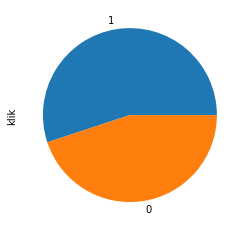

In [135]:
ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie')

In [136]:
Xtest.isnull().sum()

CYF_baner_pozycja              0
CYF_strona_id                  0
CYF_strona_domena              0
CYF_strona_kategoria           0
CYF_aplikacja_id               0
CYF_aplikacja_domena           0
CYF_aplikacja_kategoria        0
CYF_urz_id                     0
CYF_urz_ip                     0
CYF_urz_model                  0
CYF_urz_typ                    0
CYF_urz_polaczenie             0
CYF_kat1                       0
CYF_kat2                       0
CYF_kat3                       0
CYF_kat4                       0
CYF_kat5                       0
CYF_kat6                       0
CYF_kat7                       0
CYF_kat8                       0
CYF_kat9                       0
CYF_data_godzina               0
CYF_KL_strona_id               0
CYF_KL_aplikacja_id            0
CYF_KL_aplikacja_domena        0
CYF_KL4_aplikacja_kategoria    0
CYF_KL0_aplikacja_kategoria    0
CYF_KL_kat3                    0
CYF_KL_kat4                    0
CYF_KL1_kat6                   0
CYF_KL2_ka

## Współczynnik korelacji

In [137]:
CORREL = df3.corr().sort_values('klik')
CORREL['klik']

NZS8                          -0.185857
NZS7                          -0.184762
NZS4                          -0.145134
NZS1                          -0.137916
CYF_KL1_kat9                  -0.124056
CYF_KL_kat4                   -0.123912
NZS5                          -0.115781
CYF_KL_strona_id              -0.113588
CYF_KL_kat3                   -0.110713
CYF_KL1_kat6                  -0.102183
CYF_kat3                      -0.091988
CYF_KL4_aplikacja_kategoria   -0.088653
CYF_urz_polaczenie            -0.083849
CYF_KL2_kat9                  -0.077867
CYF_kat8                      -0.074104
CYF_kat9                      -0.073574
CYF_kat2                      -0.070032
CYF_KL1_kat7                  -0.068095
CYF_kat5                      -0.065577
CYF_aplikacja_kategoria       -0.059226
NZS2                          -0.045618
CYF_strona_domena             -0.039422
CYF_urz_typ                   -0.038625
CYF_kat1                      -0.036441
CYF_aplikacja_domena          -0.009856


Text(0, 0.5, 'Zmienne nezależne ciągłe')

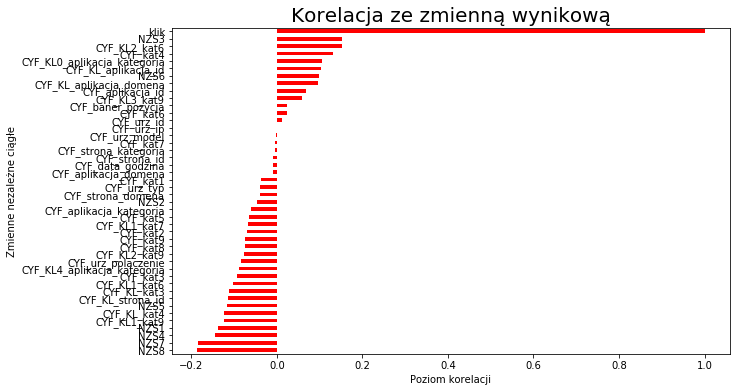

In [138]:
CORREL = df3.corr().sort_values('klik')

plt.figure(figsize=(10,6))
CORREL['klik'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

## Standaryzacja

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(Xtrain_OV)
Xtrain_OV = scaler.transform(Xtrain_OV)
Xtest = scaler.transform(Xtest)

# Analiza ważności zmiennych niezależnych PCA

In [140]:
from sklearn.decomposition import PCA

pca = PCA()
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

Nie podaliśmy liczby komponentów w konstruktorze. Dlatego wszystkie 9 zmienne z zestawu zostaną zwrócone zarówno dla zestawu szkoleniowego, jak i testowego.

Klasa PCA zawiera, explained_variance_ratio_która zwraca wariancję wywołaną przez każdą zmienną. 

In [141]:
explained_variance = pca.explained_variance_ratio_

In [142]:
SOK = np.round(explained_variance, decimals=2)
SOK

array([0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [143]:
list(zip(X, SOK))

[('CYF_baner_pozycja', 0.98),
 ('CYF_strona_id', 0.02),
 ('CYF_strona_domena', 0.0),
 ('CYF_strona_kategoria', 0.0),
 ('CYF_aplikacja_id', 0.0),
 ('CYF_aplikacja_domena', 0.0),
 ('CYF_aplikacja_kategoria', 0.0),
 ('CYF_urz_id', 0.0),
 ('CYF_urz_ip', 0.0),
 ('CYF_urz_model', 0.0),
 ('CYF_urz_typ', 0.0),
 ('CYF_urz_polaczenie', 0.0),
 ('CYF_kat1', 0.0),
 ('CYF_kat2', 0.0),
 ('CYF_kat3', 0.0),
 ('CYF_kat4', 0.0),
 ('CYF_kat5', 0.0),
 ('CYF_kat6', 0.0),
 ('CYF_kat7', 0.0),
 ('CYF_kat8', 0.0),
 ('CYF_kat9', 0.0),
 ('CYF_data_godzina', 0.0),
 ('CYF_KL_strona_id', 0.0),
 ('CYF_KL_aplikacja_id', 0.0),
 ('CYF_KL_aplikacja_domena', 0.0),
 ('CYF_KL4_aplikacja_kategoria', 0.0),
 ('CYF_KL0_aplikacja_kategoria', 0.0),
 ('CYF_KL_kat3', 0.0),
 ('CYF_KL_kat4', 0.0),
 ('CYF_KL1_kat6', 0.0),
 ('CYF_KL2_kat6', 0.0),
 ('CYF_KL1_kat9', 0.0),
 ('CYF_KL2_kat9', 0.0),
 ('CYF_KL3_kat9', 0.0),
 ('CYF_KL1_kat7', 0.0),
 ('NZS1', 0.0),
 ('NZS2', 0.0),
 ('NZS3', 0.0),
 ('NZS4', 0.0),
 ('NZS5', 0.0),
 ('NZS6', 0.0),


# Analiza ważności zmiennych niezależnych RF

In [144]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
rfc.feature_importances_

array([3.23103119e-03, 2.25524702e-02, 2.15868466e-02, 5.26322181e-03,
       1.09320568e-02, 3.43869120e-03, 3.18648331e-03, 3.70598898e-02,
       3.51648254e-01, 1.76106413e-01, 1.00393926e-03, 4.84618056e-03,
       1.52029233e-03, 4.69330397e-02, 9.81824270e-04, 6.43674926e-03,
       9.49969507e-03, 8.50058643e-04, 5.73657042e-03, 2.92837126e-02,
       3.57010729e-03, 2.07761511e-01, 9.07097066e-04, 7.45441609e-05,
       8.77565760e-04, 1.02258206e-03, 1.70831083e-04, 9.40215673e-04,
       8.20628361e-04, 1.11034687e-03, 1.23169554e-02, 6.37719370e-04,
       8.56630176e-04, 6.92216677e-04, 1.40964000e-03, 5.53157213e-03,
       3.18116932e-03, 2.30249070e-04, 1.60032298e-03, 1.08488782e-03,
       1.93896816e-03, 6.64937281e-03, 4.51744701e-03])

In [146]:
list(zip(X, rfc.feature_importances_))

[('CYF_baner_pozycja', 0.0032310311938850617),
 ('CYF_strona_id', 0.022552470183941655),
 ('CYF_strona_domena', 0.021586846595247063),
 ('CYF_strona_kategoria', 0.00526322180529274),
 ('CYF_aplikacja_id', 0.010932056799080332),
 ('CYF_aplikacja_domena', 0.0034386911981486522),
 ('CYF_aplikacja_kategoria', 0.0031864833051059313),
 ('CYF_urz_id', 0.037059889756395015),
 ('CYF_urz_ip', 0.3516482536539721),
 ('CYF_urz_model', 0.17610641286675083),
 ('CYF_urz_typ', 0.0010039392550756118),
 ('CYF_urz_polaczenie', 0.004846180558510685),
 ('CYF_kat1', 0.0015202923332811084),
 ('CYF_kat2', 0.04693303967084117),
 ('CYF_kat3', 0.0009818242697471446),
 ('CYF_kat4', 0.006436749258946335),
 ('CYF_kat5', 0.009499695074869594),
 ('CYF_kat6', 0.0008500586434899563),
 ('CYF_kat7', 0.005736570420330344),
 ('CYF_kat8', 0.029283712564898624),
 ('CYF_kat9', 0.0035701072897715213),
 ('CYF_data_godzina', 0.207761511299771),
 ('CYF_KL_strona_id', 0.0009070970664930686),
 ('CYF_KL_aplikacja_id', 7.4544160860597

# # <span style="color:blue"> Model regresji logistycznej ze słabą siatką GRID</span>

https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation

# <span style="color:blue"> Model regresji RandomForest</span>

In [147]:
print('Pomiar czasu wykonania tego zadania')
print('Minut: ',(time.time() - start_time)/60) ## koniec pomiaru czasu

Pomiar czasu wykonania tego zadania
Minut:  13.285562113920848
